In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# load the datasets
hsbc_df = pd.read_csv('/Users/shivamlokhande10/Downloads/HSBC.csv')
morgan_df = pd.read_csv('/Users/shivamlokhande10/Downloads/Morgan.csv')
svb_df = pd.read_csv('/Users/shivamlokhande10/Downloads/SVB.csv')

In [3]:
# filling missing values with the median of each column
for bank_df in [hsbc_df, morgan_df, svb_df]:
    bank_df.fillna(bank_df.median(), inplace=True)

In [4]:
# create a connection to a new in-memory database
db_connection = sqlite3.connect(':memory:')

In [5]:
# load data into the database
hsbc_df.to_sql('HSBC', db_connection, if_exists='replace', index=False)
morgan_df.to_sql('Morgan', db_connection, if_exists='replace', index=False)
svb_df.to_sql('SVB', db_connection, if_exists='replace', index=False)

5

In [6]:
# sql query: analyzing financial metrics over time
financial_query = """
SELECT Year, Bank, `Net Income`, `Provision: Credit Losses`, 
       (`Interest Income` - `Interest Expense`) AS Net_Interest_Income
FROM (
    SELECT Year, 'HSBC' AS Bank, `Net Income`, `Provision: Credit Losses`, 
           `Interest Income`, `Interest Expense` FROM HSBC
    UNION ALL
    SELECT Year, 'Morgan', `Net Income`, `Provision: Credit Losses`, 
           `Interest Income`, `Interest Expense` FROM Morgan
    UNION ALL
    SELECT Year, 'SVB', `Net Income`, `Provision: Credit Losses`, 
           `Interest Income`, `Interest Expense` FROM SVB
)
ORDER BY Year DESC, Bank
"""

In [7]:
# execute the query and fetch the results
financial_metrics_df = pd.read_sql_query(financial_query, db_connection)
print(financial_metrics_df)

    Year    Bank  Net Income  Provision: Credit Losses  Net_Interest_Income
0   2024    HSBC        0.81                     -0.05                 1.36
1   2024  Morgan        2.33                      0.05                 2.43
2   2023    HSBC        0.80                      0.02                 1.55
3   2023  Morgan        2.41                      0.17                 2.55
4   2022    HSBC        0.51                      0.03                 1.38
5   2022  Morgan        2.19                      0.15                 2.58
6   2022     SVB        0.94                      0.13                 2.15
7   2021    HSBC        0.48                      0.07                 1.37
8   2021  Morgan        1.84                      0.04                 2.14
9   2021     SVB        0.79                      0.04                 1.99
10  2020     SVB        0.99                      0.23                 2.61
11  2019     SVB        1.68                      0.15                 3.46
12  2018    

In [8]:
# Adding the Interest Income to Interest Expense Ratio Analysis
interest_ratio_query = """
SELECT Year, Bank, 
       (`Interest Income` / `Interest Expense`) AS Interest_Income_Expense_Ratio
FROM (
    SELECT Year, 'HSBC' AS Bank, `Interest Income`, `Interest Expense` FROM HSBC
    UNION ALL
    SELECT Year, 'Morgan' AS Bank, `Interest Income`, `Interest Expense` FROM Morgan
    UNION ALL
    SELECT Year, 'SVB' AS Bank, `Interest Income`, `Interest Expense` FROM SVB
)
ORDER BY Year DESC, Bank;
"""



In [9]:
interest_ratio_df = pd.read_sql_query(interest_ratio_query, db_connection)
print(interest_ratio_df)

    Year    Bank  Interest_Income_Expense_Ratio
0   2024    HSBC                       1.434505
1   2024  Morgan                       1.855634
2   2023    HSBC                       1.688889
3   2023  Morgan                       2.301020
4   2022    HSBC                       1.496403
5   2022  Morgan                       2.102564
6   2022     SVB                       5.215686
7   2021    HSBC                       2.593023
8   2021  Morgan                       4.754386
9   2021     SVB                      50.750000
10  2020     SVB                      33.625000
11  2019     SVB                      12.931034
12  2018     SVB                      45.375000


In [10]:
efficiency_ratio_query = """
SELECT Year, Bank, 
       (`Noninterest Expense` / (`Net Interest Income` + `Noninterest Income`)) * 100 AS Efficiency_Ratio
FROM (
    SELECT Year, 'HSBC' AS Bank, `Net Interest Income`, `Noninterest Income`, `Noninterest Expense` FROM HSBC
    UNION ALL
    SELECT Year, 'Morgan' AS Bank, `Net Interest Income`, `Noninterest Income`, `Noninterest Expense` FROM Morgan
    UNION ALL
    SELECT Year, 'SVB' AS Bank, `Net Interest Income`, `Noninterest Income`, `Noninterest Expense` FROM SVB
)
ORDER BY Year DESC, Bank;
"""

In [11]:
efficiency_ratio_df = pd.read_sql_query(efficiency_ratio_query, db_connection)
print(efficiency_ratio_df)

    Year    Bank  Efficiency_Ratio
0   2024    HSBC         61.450382
1   2024  Morgan         15.320334
2   2023    HSBC         57.031250
3   2023  Morgan         14.248705
4   2022    HSBC         66.801619
5   2022  Morgan         16.620499
6   2022     SVB         46.350365
7   2021    HSBC         68.584071
8   2021  Morgan         18.581081
9   2021     SVB         54.435484
10  2020     SVB         55.192878
11  2019     SVB         45.353982
12  2018     SVB         44.933921


In [12]:
def plot_financial_trend(df, metric_column, title, y_label):
    plt.figure(figsize=(10, 6))
    for bank_name in df['Bank'].unique():
        bank_subset = df[df['Bank'] == bank_name]
        plt.plot(bank_subset['Year'], bank_subset[metric_column], marker='o', label=bank_name)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

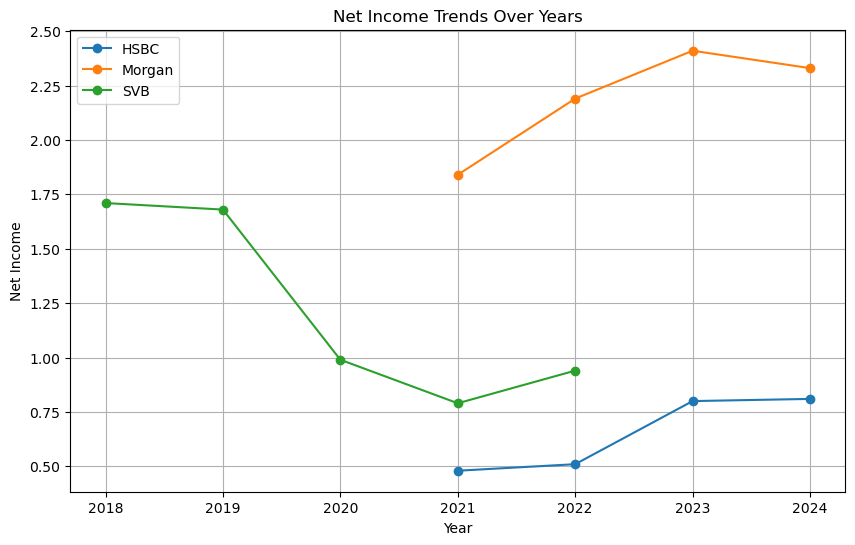

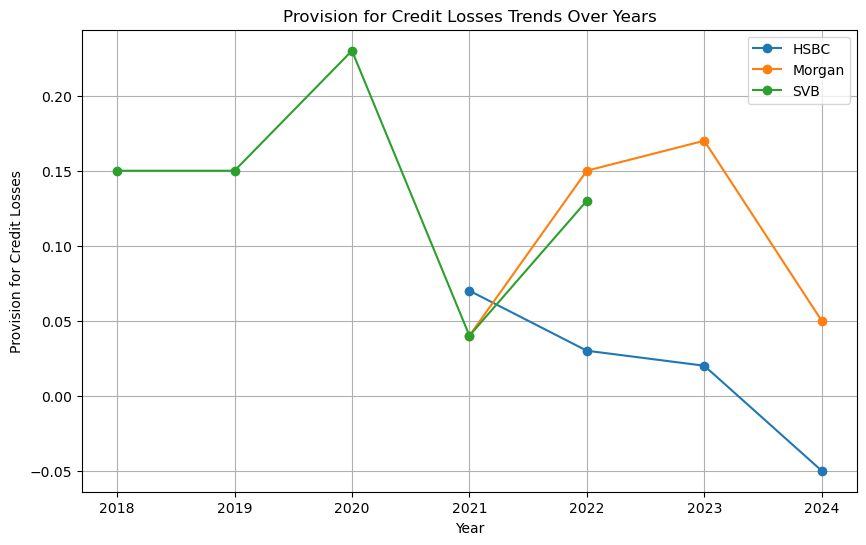

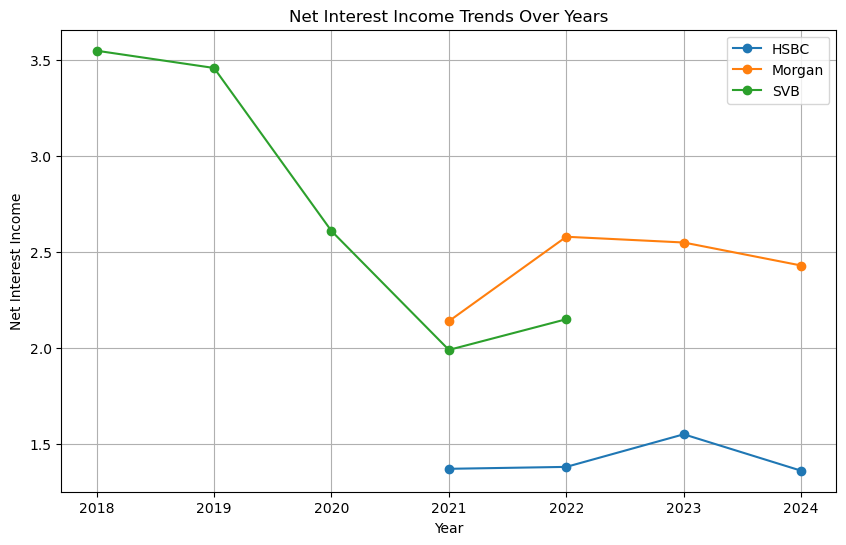

In [13]:
plot_financial_trend(financial_metrics_df, 'Net Income', 'Net Income Trends Over Years', 'Net Income')
plot_financial_trend(financial_metrics_df, 'Provision: Credit Losses', 'Provision for Credit Losses Trends Over Years', 'Provision for Credit Losses')
plot_financial_trend(financial_metrics_df, 'Net_Interest_Income', 'Net Interest Income Trends Over Years', 'Net Interest Income')


In [14]:
def plot_yoy_net_income_change():
    plt.figure(figsize=(10, 6))
    for bank_name, bank_df in [('HSBC', hsbc_df), ('Morgan', morgan_df), ('SVB', svb_df)]:
        bank_df['YoY_Net_Income_Change'] = bank_df['Net Income'].pct_change() * 100
        plt.plot(bank_df['Year'], bank_df['YoY_Net_Income_Change'], marker='o', label=bank_name)
    plt.title('Year-over-Year Percentage Change in Net Income')
    plt.xlabel('Year')
    plt.ylabel('Percentage Change in Net Income (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

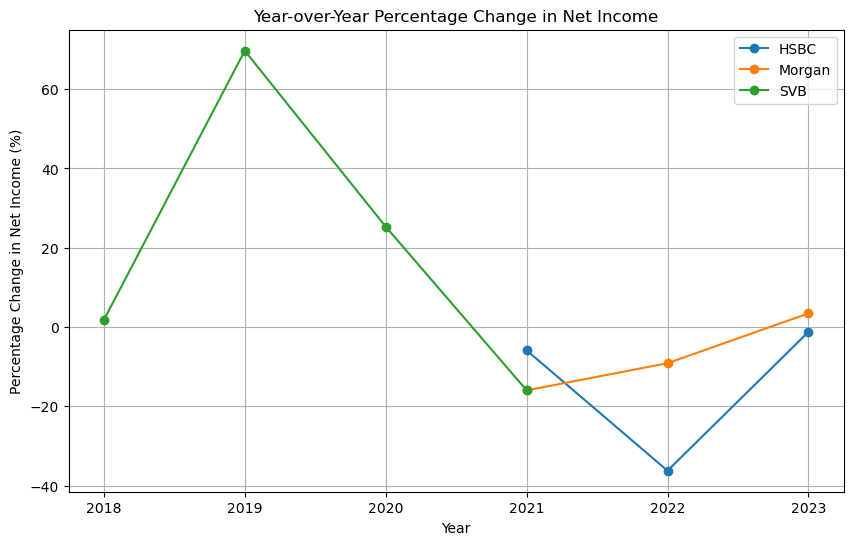

In [15]:
plot_yoy_net_income_change()

In [16]:
def plot_net_income_vs_credit_losses():
    plt.figure(figsize=(10, 6))
    for bank_name, bank_df in [('HSBC', hsbc_df), ('Morgan', morgan_df), ('SVB', svb_df)]:
        plt.scatter(bank_df['Provision: Credit Losses'], bank_df['Net Income'], label=bank_name, s=50, alpha=0.7)
    plt.title('Net Income vs. Provision for Credit Losses')
    plt.xlabel('Provision for Credit Losses')
    plt.ylabel('Net Income')
    plt.legend()
    plt.grid(True)
    plt.show()

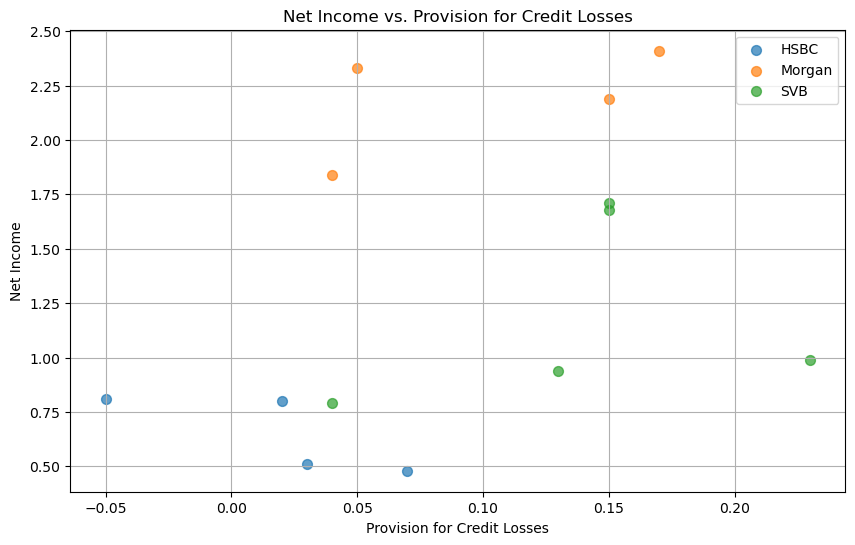

In [17]:
plot_net_income_vs_credit_losses()

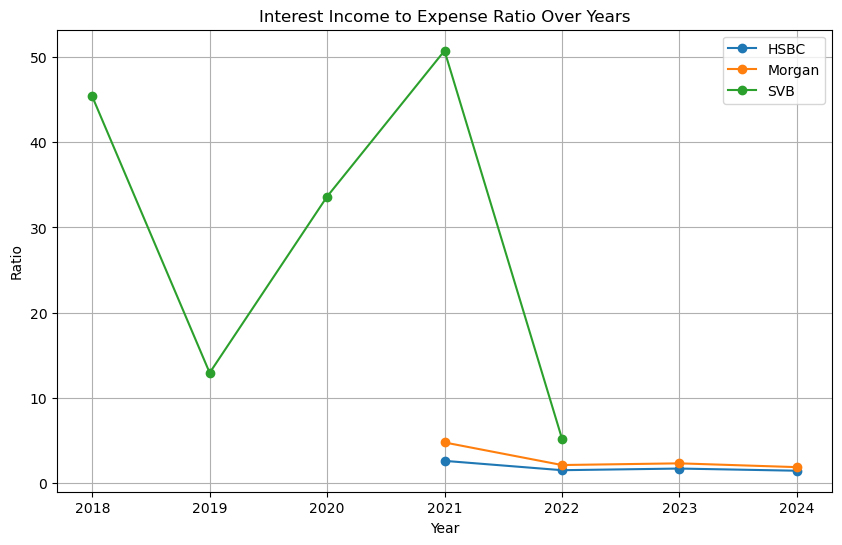

In [18]:
plot_financial_trend(interest_ratio_df, 'Interest_Income_Expense_Ratio',
                     'Interest Income to Expense Ratio Over Years', 'Ratio')

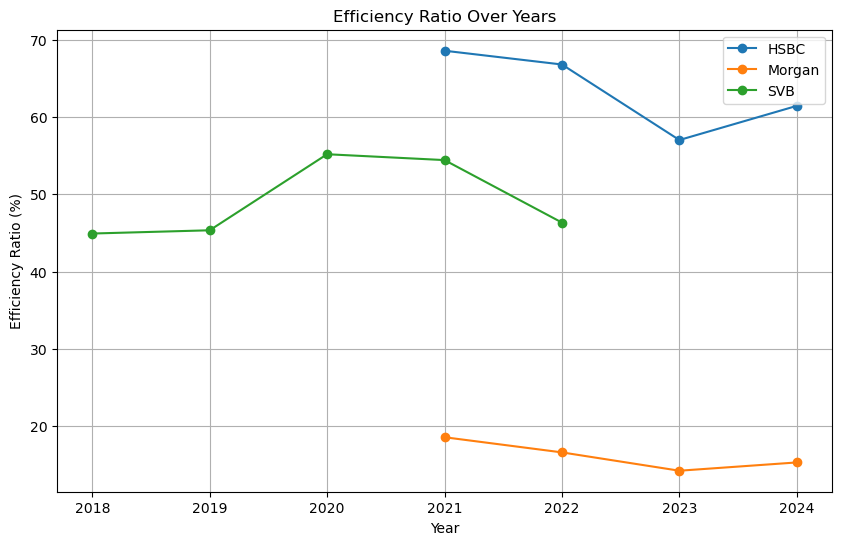

In [19]:
plot_financial_trend(efficiency_ratio_df, 'Efficiency_Ratio',
                     'Efficiency Ratio Over Years', 'Efficiency Ratio (%)')